In [ ]:
import numpy as np
from scipy.integrate import odeint
from matplotlib.pyplot import *

## Code used in the lecture. Feel free to play

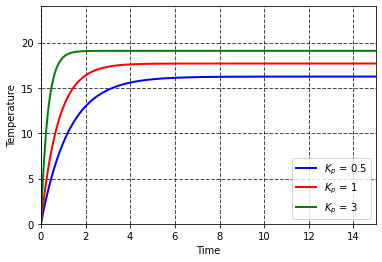

In [201]:
#Thermostat with proportional control
def Thermostat(x, t):
    T_ambient = 10
    a = 0.3
    return a*(T_ambient - x)

def Thermostat_Pcontrol(x,t,T_ref,K_p):
    return Thermostat(x, t) + K_p*(T_ref-x) 

T0 = 0 # initial state
T_ref = 20
    
t0 = 0 # Initial time 
tf = 15 # Final time
t = np.linspace(t0, tf, 1000) 

K_p = 0.5
solution = odeint(Thermostat_Pcontrol, T0, t, args=(T_ref,K_p))
plot(t, solution, linewidth=2.0, color = 'blue')

K_p = 1
solution = odeint(Thermostat_Pcontrol, T0, t, args=(T_ref,K_p))
plot(t, solution, linewidth=2.0, color = 'red')

K_p = 3
solution = odeint(Thermostat_Pcontrol, T0, t, args=(T_ref,K_p))
plot(t, solution, linewidth=2.0, color = 'green')

grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([t0, tf])
ylim([t0, T_ref + 0.2*T_ref])
xlabel(r'Time')
ylabel(r'Temperature')
legend(['$K_p$ = 0.5', '$K_p$ = 1', '$K_p$ = 3'])

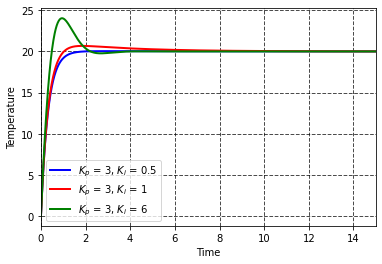

In [208]:
#Thermostat with proportional integral control
def Thermostat_PIcontrol(x,t,T_ref,K_p,K_i):
    x1,x2 = x
    dx1 = Thermostat(x1, t) + K_p*(T_ref-x1) + K_i*(x2)
    dx2 = T_ref - x1
    return [dx1,dx2]

T0 = [0,0]  # initial state
T_ref = 20

K_p = 3

K_i = 0.5
solution = odeint(Thermostat_PIcontrol, T0, t, args=(T_ref,K_p,K_i))
plot(t, solution[:,0], linewidth=2.0, color = 'blue')

K_i = 1
solution = odeint(Thermostat_PIcontrol, T0, t, args=(T_ref,K_p,K_i))
plot(t, solution[:,0], linewidth=2.0, color = 'red')

K_i = 6
solution = odeint(Thermostat_PIcontrol, T0, t, args=(T_ref,K_p,K_i))
plot(t, solution[:,0], linewidth=2.0, color = 'green')

grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([t0, tf])
xlabel(r'Time')
ylabel(r'Temperature')

legend(['$K_p$ = 3, $K_i$ = 0.5', '$K_p$ = 3, $K_i$ = 1', '$K_p$ = 3, $K_i$ = 6'])

## DC Motor Speed: System Modeling

A common actuator in control systems is the DC motor. It directly provides rotary motion and, coupled with wheels or drums and cables, can provide translational motion. The electric equivalent circuit of the armature and the free-body diagram of the rotor are shown in the following figure.

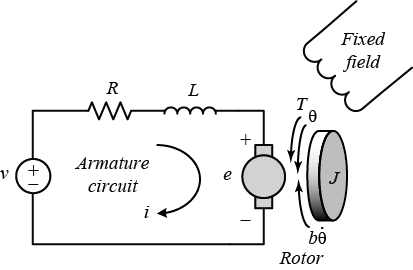

For this example, we will assume that the input of the system is the voltage source ($V$) applied to the motor's armature, while the output is the rotational speed of the shaft $\dot{\theta}$. The rotor and shaft are assumed to be rigid. We further assume a viscous friction model, that is, the friction torque is proportional to shaft angular velocity. We will assume that the magnetic field is constant and, therefore, that the motor torque is proportional (with constant $K_t$) to only the armature current. Let us remark that in SI units the motor torque and back emf constants are equal, that is, $K_t = K_e$;

The physical parameters for our example are:

    (J)   moment of inertia of the rotor     0.01 kg.m^2

    (b)     motor viscous friction constant    0.1 N.m.s

    (Ke)    electromotive force constant       0.01 V/rad/sec

    (Kt)    motor torque constant              0.01 N.m/Amp

    (R)     electric resistance                1 Ohm

    (L)     electric inductance                0.5 H
    

Let us suppose that measured output of the system is the angular velocity of the rotor $\dot{\theta}$ and the current intensity $\dot{i}$. Then the state space model of the system is the following:

$$\dot x = Ax + Bu$$

$$ y = Cx$$

where state vector $x=(\dot{\theta}, i)$, control vector $u=V$, and state and control matrices are the following

$$ A = \begin{pmatrix} -\frac{b}{J}&\frac{K}{J}\\ -\frac{K}{L}&-\frac{R}{L}\end{pmatrix},\ B = \begin{pmatrix} 0\\ \frac{1}{L} 
\end{pmatrix}$$

Let us suppose that we only interested in rotation speed (angular velocity of the rotor), i.e. $C=(1,0)$.

For a 1-rad/sec step reference, the design criteria are the following.

    Settling time less than 2 seconds

    Overshoot less than 5%

    Steady-state error less than 1%

overshut 0.07353291680196916
ss_error -0.11120986562334323


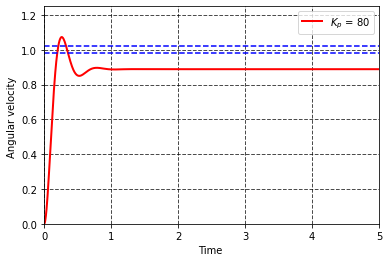

In [253]:
def StateSpace_PController(x, t, A, B, C, y_ref, K_p):
    u = K_p*(y_ref - np.dot(C,x))
    return np.dot(A,x) + np.dot(B,u)

J = 0.01
b = 0.1
K = 0.01
R = 1
L = 0.5

y_ref = 1.0

A = np.array([[-b/J, K/J],
              [-K/L, -R/L]])

B = np.array([0,
             1/L])

C = np.array([1,0])

x0 = np.array([0,
               0])  # initial state

t0 = 0 # Initial time 
tf = 5 # Final time
t = np.linspace(t0, tf, 1000)

K_p = 80;

solution = odeint(StateSpace_PController, x0, t, args=(A,B,C,y_ref,K_p))

y = (C * solution)[:,0]

plot(t, y, linewidth=2.0, color = 'red')
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([t0, tf])
ylim([0, 1.25])
ylabel(r'Angular velocity ')
xlabel(r'Time ')
legend(['$K_p$ = 80'])

plot(t, 0.98*y_ref*np.ones(len(t)), linestyle='--', color = 'blue')
plot(t, 1.02*y_ref*np.ones(len(t)), linestyle='--', color = 'blue')

overshut = max(abs(y))/y_ref - 1
ss_error = y[len(t)-1]-y_ref
print('overshut', overshut)
print('ss_error', ss_error)

overshut 0.22573855732687065
ss_error -0.005540550727208049


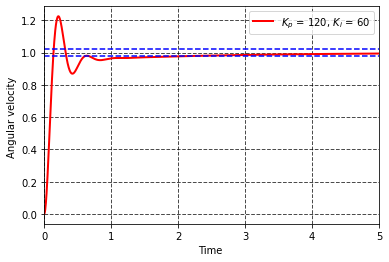

In [256]:
J = 0.01
b = 0.1
K = 0.01
R = 1
L = 0.5

y_ref = 1.0

K_p = 120;

K_i = 60;

def StateSpace_PIController(x, t, A, B, C, R, y_ref, K_p):
    u = K_p*(y_ref - np.dot(C,x))
    return np.dot(A,x) + np.dot(B,u) + np.dot(R,y_ref)

A = np.array([[-b/J, K/J, 0],
              [-K/L, -R/L, K_i/L],
               [-1, 0 ,0]])

B = np.array([0,
             1/L, 0])

R = np.array([0,0,1])

C = np.array([1, 0, 0])

x0 = np.array([0,
               0,0])  # initial state

t0 = 0 # Initial time 
tf = 5 # Final time
t = np.linspace(t0, tf, 1000)


solution = odeint(StateSpace_PIController, x0, t, args=(A,B,C,R,y_ref,K_p))

y = (C * solution)[:,0]

plot(t, y, linewidth=2.0, color = 'red')
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([t0, tf])
ylabel(r'Angular velocity ')
xlabel(r'Time ')
legend(['$K_p$ = 120, $K_i$ = 60'])

plot(t, 0.98*y_ref*np.ones(len(t)), linestyle='--', color = 'blue')
plot(t, 1.02*y_ref*np.ones(len(t)), linestyle='--', color = 'blue')

overshut = max(abs(y))/y_ref - 1
ss_error = y[len(t)-1]-y_ref

print('overshut', overshut)
print('ss_error', ss_error)

overshut -0.0017096343162696925
ss_error -0.0017096343162696925


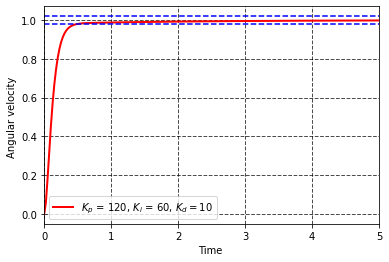

In [259]:
J = 0.01
b = 0.1
K = 0.01
R = 1
L = 0.5

y_ref = 1.0

K_p = 120;

K_i = 60;

K_d = 10;

def StateSpace_PIDController(x, t, A, B, C, R, y_ref):
    return np.dot(A,x) + np.dot(R,y_ref)

A = np.array([[-b/J, K/J, 0],
              [-K/L - K_p/L + (b*K_d)/(J*L), -R/L - (K*K_d)/(J*L), K_i/L],
               [-1, 0 ,0]])

B = np.array([0,
             1/L, 0])

R = np.array([0,K_p/L,1])

C = np.array([1, 0, 0])

x0 = np.array([0,
               0,0])  # initial state

t0 = 0 # Initial time 
tf = 5 # Final time
t = np.linspace(t0, tf, 200)


solution = odeint(StateSpace_PIDController, x0, t, args=(A,B,C,R,y_ref))

y = (C * solution)[:,0]

plot(t, y, linewidth=2.0, color = 'red')
grid(color = 'black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([t0, tf])
ylabel(r'Angular velocity ')
xlabel(r'Time ')
legend(['$K_p$ = 120, $K_i$ = 60, $K_d = 10$'])

plot(t, 0.98*y_ref*np.ones(len(t)), linestyle='--', color = 'blue')
plot(t, 1.02*y_ref*np.ones(len(t)), linestyle='--', color = 'blue')


overshut = max(abs(y))/y_ref - 1
ss_error = y[len(t)-1]-y_ref

print('overshut', overshut)
print('ss_error', ss_error)

## EX 1:  Mass-spring damper system

Let us consider mass-spring damper system

![mass-spring%20damper%20system.png](attachment:mass-spring%20damper%20system.png)

with the following system parameters:

    mass  m = 1.0 kg

    spring constant k = 5.0 N/m

    damping constant $\rho$ = 2 Ns/m

Let us suppose that measured output of the system is a position of the mass.

Let us also assume that position of the system is disturbed with external signal $d(t)= 1, t>0.$

## TODO

1. Implement PID controller corresponding to the refernce signal x_ref = 0 m. 

2. Tune it to satisfay performance specifications

    Rise time < 5 s
    
    Overshoot < 10%
    
    Steady-state error < 2%


## EX. 2 Inverted Pendulum

The system in this example consists of an inverted pendulum mounted to a motorized cart. The inverted pendulum system is an example commonly found in control system textbooks and research literature. Its popularity derives in part from the fact that it is unstable without control, that is, the pendulum will simply fall over if the cart isn't moved to balance it. Additionally, the dynamics of the system are nonlinear. The objective of the control system is to balance the inverted pendulum by applying a force to the cart that the pendulum is attached to. A real-world example that relates directly to this inverted pendulum system is the attitude control of a booster rocket at takeoff.

![2024-01-23_13-32-20.png](attachment:2024-01-23_13-32-20.png)

Let us consider the system with the following system parameters
    
    (M)       mass of the cart                         0.5 kg
    
    (m)       mass of the pendulum                     0.2 kg
    
    (l)       length to pendulum center of mass        0.3 m
    
    (b)       coefficient of friction for cart         0.1 N/m/sec
    
    (I)       mass moment of inertia of the pendulum   0.006 kg.m^2
    
    (F)       force applied to the cart
    
    (y)       cart position coordinate
    
    (theta)   angle between the pendulum and the vertical axis

## TODO
    
1) Show that inverted pendulum on the cart can be modeled as follows

$$(M+m)\ddot{y} + b\dot{y} + ml\ddot{\theta}\cos\theta -ml\dot\theta^2\sin(\theta) = F$$

$$ml\cos(\theta)\ddot{y} + (I+ml^2)\ddot{\theta} - mgl\sin\theta = 0$$    

2) Show that linearalised model have the following form

$$\dot x = Ax + Bu$$

$$ y = Cx$$

where state vector $x = (y,\theta,\dot{y},\dot{\theta})$, control vector $u=F$.

$$\left[\begin{array}{c}\dot{y} \\ \dot{\theta} \\ \ddot{y} \\ \ddot{\theta}\end{array}\right]=
\left[\begin{array}{cccc}0 & 0 & 1 & 0 \\ 
0 & 0 & 0 & 1 \\ 
0 & \frac{-g m^2 l^2}{I(M+m)+M m l^2} & \frac{-\left(I+m l^2\right) b}{I(M+m)+M m l^2} & 0 \\ 
0 & \frac{m g l(M+m)}{I(M+m)+M m l^2} & \frac{m l b}{I(M+m)+M m l^2} & 0\end{array}\right]
\left[\begin{array}{c}y \\ \theta \\ \dot{y} \\ \dot{\theta}\end{array}\right]+
\left[\begin{array}{c}0 \\ 0 \\ \frac{I+m l^2}{I(M+m)+M m l^2} \\ \frac{-m l}{I(M+m)+M m l^2}\end{array}\right] u$$

$$
\mathbf{y}=
\left[\begin{array}{llll}1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0\end{array}\right]
\left[\begin{array}{c}y \\ \theta \\ \dot{y} \\ \dot{\theta}\end{array}\right]$$

You can use symbolic calcus https://scipy-lectures.org/packages/sympy.html#calculus to make calcultaions easier

3) Design a PID controler corresponding to the refernce signal $\theta_ref$ = 0 rad, while supposing that the angle is subject to a constant disturbance $d(t) = 0.1$

4) What is going on with position of the cart for closed-loop system?